In [64]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as mp
!pip install squarify
import squarify as sq

In [17]:
# Load dataframe of sheet Order
orders = pd.read_excel('D:\STUDY\STUDY\PYTHON\Final_project_RFM\Dataset.xlsx',sheet_name='Orders')
orders.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926
5,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10004632,20.720,2,7.1225
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096
7,1878,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,FUR-CH-10002880,393.568,4,109.4611
8,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,Consumer,90049,TEC-PH-10002563,302.376,3,93.2326
9,2875,US-2017-102638,2017-12-29,2017-12-31,First Class,MC-17845,Consumer,10035,OFF-FA-10002988,6.030,3,1.0251


In [18]:
# Check null value for sheet Orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [19]:
# Remove blank spaces between words in column name
orders.columns = [col.lower().replace(' ','_') for col in orders.columns]
orders.head(0)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,channel,postal_code,product_id,sales,quantity,unit_cost


In [27]:
# Compute Total value of each order (group by order_id, order_date and customer_id then sum the sales column for each group)
# DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)

grouped_orders = orders.groupby(['order_id', 'order_date', 'customer_id'], as_index = False)['sales'].sum()
grouped_orders

,order_id,order_date,customer_id,sales
0,CA-2014-100006,2014-09-07,DK-13375,377.970
1,CA-2014-100090,2014-07-08,EB-13705,699.192
2,CA-2014-100293,2014-03-14,NF-18475,91.056
3,CA-2014-100328,2014-01-28,JC-15340,3.928
4,CA-2014-100363,2014-04-08,JM-15655,21.376
...,...,...,...,...
5004,US-2017-168802,2017-11-03,JO-15145,18.368
5005,US-2017-169320,2017-07-23,LH-16900,171.430
5006,US-2017-169488,2017-09-07,AA-10375,56.860
5007,US-2017-169502,2017-08-28,MG-17650,113.410


In [28]:
# Load dataframe for Sheet Return, check null value and remove blank spaces between words in column name (same as sheet Order)
returns = pd.read_excel('D:\STUDY\STUDY\PYTHON\Final_project_RFM\Dataset.xlsx',sheet_name='Return')
returns.info()
returns.columns = [col.lower().replace(' ','_') for col in returns.columns]
returns.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


Index(['returned', 'order_id'], dtype='object')

In [29]:
# Merger grouped_orders with returns in order to include all rows from the left DataFrame (grouped_order), and only matching rows from the right DataFrame (returns)
# DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

merge_grorder_return = grouped_orders.merge(returns, how = 'left', on = 'order_id')

# Exclude stage: 
## Create boolean mask to filter data where the column order_id of merger_grorder_return is not match order_id of return.
## Use '~' operator to negate the mask above so that only rows where the 'order_id' is not in the return DataFrame are kept

valid_orders = merge_grorder_return[~merge_grorder_return['order_id'].isin(returns['order_id'])].drop('returned', axis=1)
valid_orders

,order_id,order_date,customer_id,sales
0,CA-2014-100006,2014-09-07,DK-13375,377.970
1,CA-2014-100090,2014-07-08,EB-13705,699.192
2,CA-2014-100293,2014-03-14,NF-18475,91.056
3,CA-2014-100328,2014-01-28,JC-15340,3.928
4,CA-2014-100363,2014-04-08,JM-15655,21.376
...,...,...,...,...
5004,US-2017-168802,2017-11-03,JO-15145,18.368
5005,US-2017-169320,2017-07-23,LH-16900,171.430
5006,US-2017-169488,2017-09-07,AA-10375,56.860
5007,US-2017-169502,2017-08-28,MG-17650,113.410


In [34]:
# Calculate R value, F value, M value for valid_orders
## Reference point for calculating recency values 2017-12-31 -> creates a datetime object called today that represents 2017-12-31
today = dt.datetime.strptime('2017-12-31', '%Y-%m-%d')

## Group the valid_orders by customer_id and calculates the maximum order date, the number of orders (frequency), and the total sales (monetary value) for each customer
RFM = valid_orders.groupby('customer_id').agg({'order_date': 'max', 'order_id': 'count', 'sales': 'sum'}).reset_index()

## Rename columns of RFM dataframe (optional)
RFM.columns = ['customer_id', 'max_date', 'Frequency', 'Monetary']

## Calculates the Recency value for each customer (minus the maximum order date from the reference date today) and then convert object to days
RFM['Recency'] = (today - RFM['max_date']).dt.days

## Drop the max_date since we won't need it anymore (optional)
RFM = RFM.drop('max_date', axis=1)

## Rearrange columns (optional)
RFM = RFM[['customer_id', 'Recency', 'Frequency', 'Monetary']]
RFM

,customer_id,Recency,Frequency,Monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156
...,...,...,...,...
786,XP-21865,83,9,2110.726
787,YC-21895,5,4,5438.650
788,YS-21880,10,8,6720.444
789,ZC-21910,55,12,7892.998


In [37]:
# Assign range for RFM then calculate R score, F score, and M score using quintiles method. R_variable range from 5 to 1 (in descending order) and R_variable will contain the integers 5, 4, 3, 2, and 1
# Note: set q parameter = 5 since we want to divide data into 5 quantiles
# Using qcut() function to calculate the recency score, frequency score, monetary score for each row. 
# pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')

R_variable = range(5, 0, -1)
F_variable = range(1, 6)
M_variable = range(1, 6)

RFM['R_scores'] = pd.qcut(RFM['Recency'], q = 5, labels = R_variable)
RFM['F_scores'] = pd.qcut(RFM['Frequency'], q = 5, labels = F_variable)
RFM['M_scores'] = pd.qcut(RFM['Monetary'], q = 5, labels = M_variable)


In [48]:
# Combines the three individual RFM scores (recency, frequency, and monetary) into a single integer score

RFM['RFM_Score'] = RFM['R_scores'].astype(str) + RFM['F_scores'].astype(str) + RFM['M_scores'].astype(str)
RFM['RFM_Score'] = RFM['RFM_Score'].astype(int)
RFM.head(10)

,customer_id,Recency,Frequency,Monetary,R_scores,F_scores,M_scores,RFM_scores,RFM_Score
0,AA-10315,185,5,5563.560,2,2,5,225,225
1,AA-10375,20,9,1056.390,5,5,2,552,552
2,AA-10480,260,4,1790.512,2,1,3,213,213
3,AA-10645,483,5,5073.975,1,2,5,125,125
4,AB-10015,416,3,886.156,1,1,2,112,112
5,AB-10060,55,8,7755.620,4,4,5,445,445
6,AB-10105,42,9,13881.263,4,5,5,455,455
7,AB-10150,42,5,966.710,4,2,2,422,422
8,AB-10165,26,8,1113.838,5,4,2,542,542
9,AB-10255,167,8,897.482,2,4,2,242,242


In [49]:
# Load dataframe of customer segmentation to each RFM_scores (same as order and return sheet)

segment = pd.read_excel('D:\STUDY\STUDY\PYTHON\Final_project_RFM\Dataset.xlsx', sheet_name='Segmentation')
segment.columns = [col.replace(' ', '_') for col in segment.columns]
segment

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [50]:
# Convert rfm_score to list
## Splits the rfm_score column by commas, creating a nested list of strings in each row
segment['RFM_Score'] = segment['RFM_Score'].str.split(',')

## Explodes the rfm_score column, creating a new row for each element in the nested list. The resulting DataFrame has more rows and each row corresponds to a unique RFM score for a given customer segment
segment = segment.explode('RFM_Score').reset_index(drop=True)

## Use astype(int) convert rfm_score column from strings to integers
## Note: this step is important since we want to sort the customers by their RFM score, and integer sorting is more efficient and meaningful than string sorting
segment['RFM_Score'] = segment['RFM_Score'].astype(int)

# Sorting. Puts the segments in order from "best" to "worst" based on their average RFM score.
segment.sort_values(by='RFM_Score')
segment.head(10)

,Segment,RFM_Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
5,Champions,455
6,Champions,445
7,Loyal,543
8,Loyal,444
9,Loyal,435


In [51]:
# Merge the RFM and segment DataFrames based on their RFM_Score column
Merge_RFM_segment = RFM.merge(segment, how='left', on='RFM_Score')
Merge_RFM_segment

,customer_id,Recency,Frequency,Monetary,R_scores,F_scores,M_scores,RFM_scores,RFM_Score,Segment
0,AA-10315,185,5,5563.560,2,2,5,225,225,At Risk
1,AA-10375,20,9,1056.390,5,5,2,552,552,Potential Loyalist
2,AA-10480,260,4,1790.512,2,1,3,213,213,About To Sleep
3,AA-10645,483,5,5073.975,1,2,5,125,125,At Risk
4,AB-10015,416,3,886.156,1,1,2,112,112,Lost customers
...,...,...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353,353,Potential Loyalist
787,YC-21895,5,4,5438.650,5,1,5,515,515,Promising
788,YS-21880,10,8,6720.444,5,4,5,545,545,Champions
789,ZC-21910,55,12,7892.998,4,5,5,455,455,Champions


C:\Users\meebo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


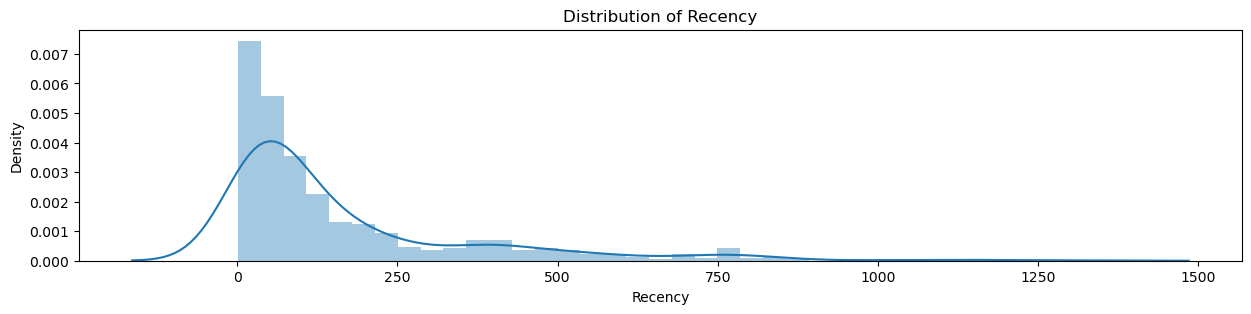

C:\Users\meebo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


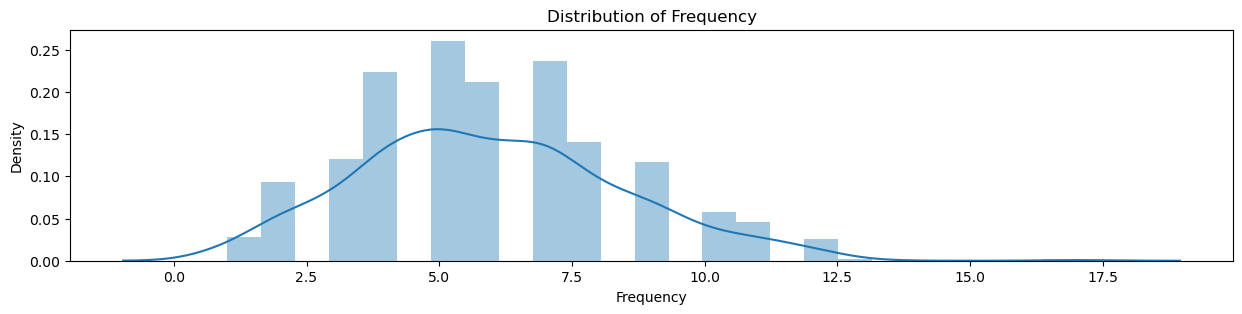

C:\Users\meebo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


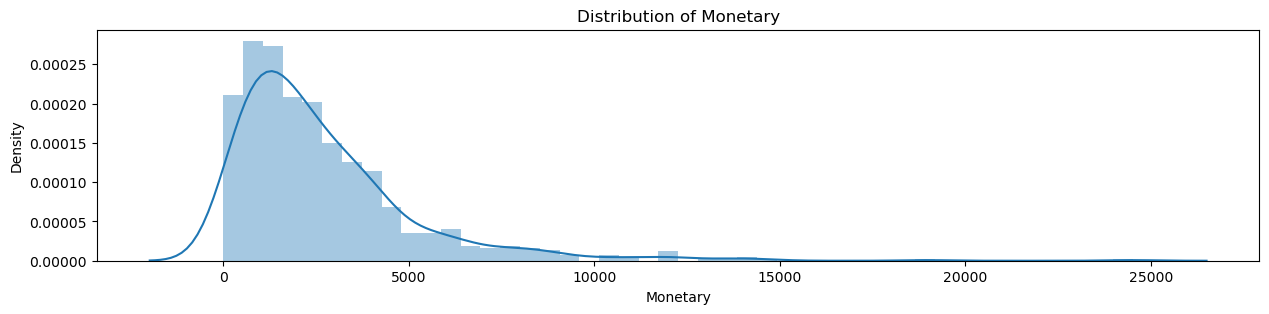

In [58]:
# Histogram distribution of each variable

column_names = ['Recency', 'Frequency', 'Monetary']

for col in column_names:
    fig, ax = mp.subplots(figsize=(15,3))
    sb.distplot(Merge_RFM_segment[col])
    ax.set_title('Distribution of %s' % col)
    mp.show()

In [61]:
# Prepare data for treemap
group = Merge_RFM_segment.groupby('Segment').agg({'customer_id': 'count', 'Monetary': 'sum','Recency': 'mean'}).reset_index()
group.columns = ['Segment', 'customer_count', 'total_monetary', 'mean_recency']
group.sort_values(by='customer_count', ascending=False, inplace=True)
group

,Segment,customer_count,total_monetary,mean_recency
9,Potential Loyalist,113,190944.9303,45.185841
1,At Risk,96,385996.8861,259.041667
4,Hibernating customers,90,109960.2510,190.044444
5,Lost customers,83,54264.2255,557.963855
7,Need Attention,72,259412.3922,50.138889
3,Champions,71,382096.5868,28.521127
10,Promising,63,224803.8955,35.253968
6,Loyal,62,270680.2154,60.725806
8,New Customers,61,40997.1410,41.475410
0,About To Sleep,44,47310.1172,135.204545


In [62]:
group['count_share'] = group['customer_count'] / group['customer_count'].sum()
group['monetary_share'] = group['total_monetary'] / group['total_monetary'].sum()
group

,Segment,customer_count,total_monetary,mean_recency,count_share,monetary_share
9,Potential Loyalist,113,190944.9303,45.185841,0.142857,0.090209
1,At Risk,96,385996.8861,259.041667,0.121365,0.182358
4,Hibernating customers,90,109960.2510,190.044444,0.113780,0.051949
5,Lost customers,83,54264.2255,557.963855,0.104930,0.025636
7,Need Attention,72,259412.3922,50.138889,0.091024,0.122555
3,Champions,71,382096.5868,28.521127,0.089760,0.180516
10,Promising,63,224803.8955,35.253968,0.079646,0.106205
6,Loyal,62,270680.2154,60.725806,0.078382,0.127879
8,New Customers,61,40997.1410,41.475410,0.077118,0.019368
0,About To Sleep,44,47310.1172,135.204545,0.055626,0.022351


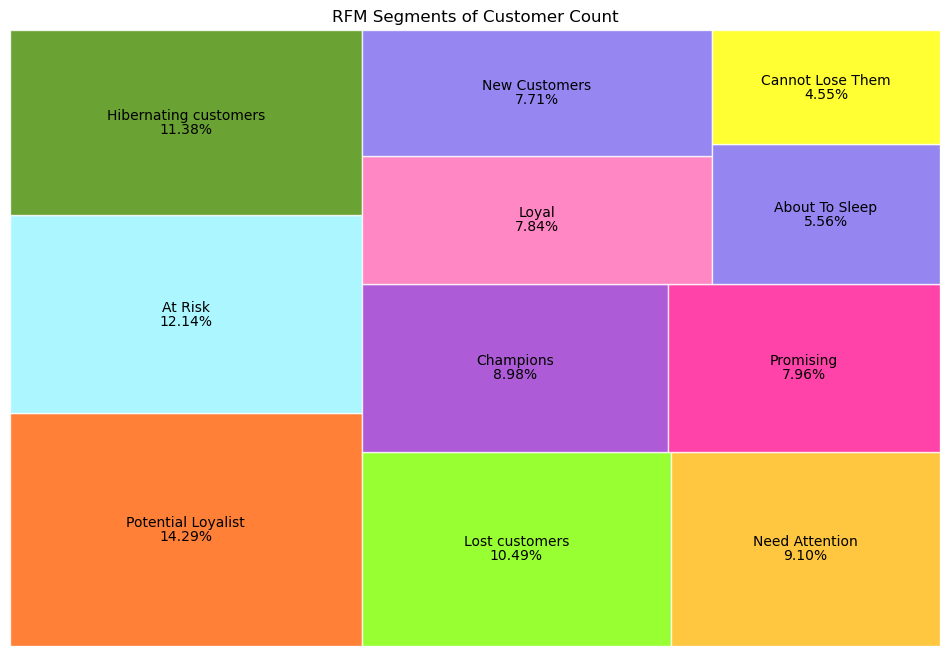

In [68]:
# Treemap. Note: we can use RGB instead of Hex for colors but it will involve setting up a lot of variable for each color

colors = ['#FF6103','#98F5FF','#458B00','#7FFF00','#FFB90F','#9932CC','#FF1493','#FF69B4','#7B68EE','#7A67EE','#FFFF00']

fig, ax = mp.subplots(1, figsize = (12,8))

sq.plot(sizes = group['customer_count'], 
              label = group['Segment'],
              value = [f'{x*100:.2f}%' for x in group['count_share']],
              alpha = .8,
              color = colors,
              bar_kwargs = dict(linewidth=1, edgecolor="white")
             )
mp.title('RFM Segments of Customer Count', fontsize=12)
mp.axis('off')
mp.show()

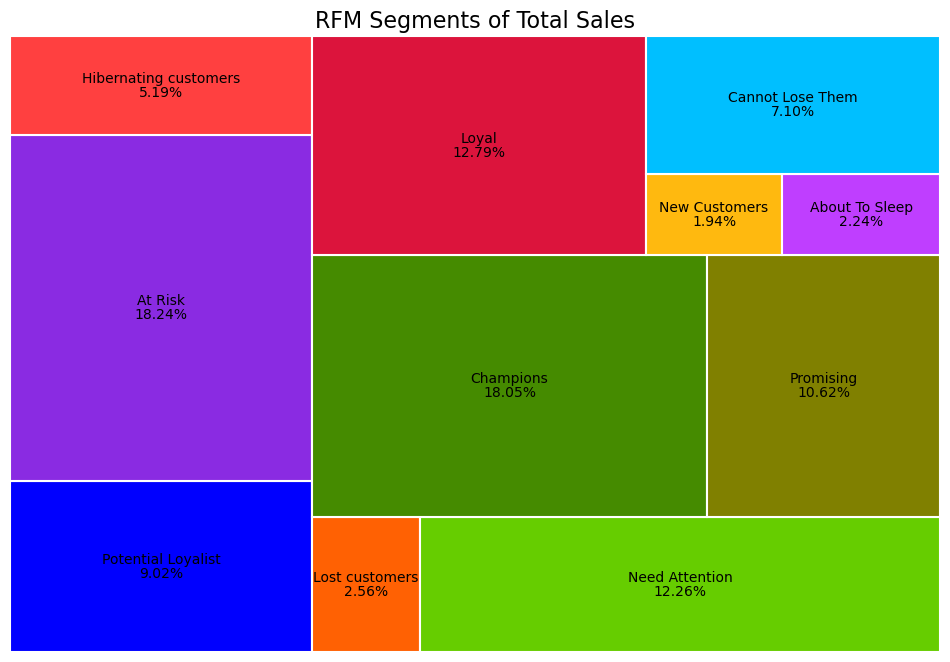

In [71]:
# Note: we can use RGB for colors but it will involve setting up a lot of variable for each color
colors = ['#0000FF','#8A2BE2','#FF4040','#FF6103','#66CD00','#458B00','#808000','#DC143C','#FFB90F','#BF3EFF','#00BFFF']

fig, ax = mp.subplots(1, figsize = (12,8))

sq.plot(sizes = group['monetary_share'], 
              label = group['Segment'],
              value = [f'{x*100:.2f}%' for x in group['monetary_share']],
              alpha = 1,
              color = colors,
              bar_kwargs = dict(linewidth=1.5, edgecolor="white")
             )
mp.title('RFM Segments of Total Sales', fontsize=16)
mp.axis('off')
mp.show()